<a href="https://colab.research.google.com/github/KEMAL-MUDIE/KEMAL-MUDIE/blob/main/Assignment__1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
import seaborn as sns 
from sklearn import preprocessing
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
sns.set(color_codes=True)

In [ ]:
df = pd.read_excel('/content/drive/MyDrive/DA Lab Ass1/merged_data.xlsx')
df.head()

,Unnamed: 0,State,AreaName,All_Poverty,M_Poverty,F_Poverty,FIPS,Med_Income,Med_Income_White,Med_Income_Black,...,F_Without,All_With,All_Without,fips_x,Incidence_Rate,Avg_Ann_Incidence,recent_trend,fips_y,Mortality_Rate,Avg_Ann_Deaths
0,0,AK,"Aleutians East Borough, Alaska",553,334,219,2013,61518.0,72639.0,31250.0,...,540,1442,1857,2013,*,3 or fewer,*,2013,*,*
1,1,AK,"Aleutians West Census Area, Alaska",499,273,226,2016,84306.0,97321.0,93750.0,...,564,4177,1333,2016,*,3 or fewer,*,2016,*,*
2,2,AK,"Anchorage Municipality, Alaska",23914,10698,13216,2020,78326.0,87235.0,50535.0,...,21393,243173,44638,2020,61.5,131,stable,2020,47.3,96
3,3,AK,"Bethel Census Area, Alaska",4364,2199,2165,2050,51012.0,92647.0,73661.0,...,1774,13023,4482,2050,62.7,6,stable,2050,58.3,5
4,4,AK,"Bristol Bay Borough, Alaska",69,33,36,2060,79750.0,88000.0,NaN,...,67,768,191,2060,*,3 or fewer,*,2060,*,*


In [ ]:
df.drop('Unnamed: 0' ,axis=1, inplace=True)
df.head()

,State,AreaName,All_Poverty,M_Poverty,F_Poverty,FIPS,Med_Income,Med_Income_White,Med_Income_Black,Med_Income_Nat_Am,...,F_Without,All_With,All_Without,fips_x,Incidence_Rate,Avg_Ann_Incidence,recent_trend,fips_y,Mortality_Rate,Avg_Ann_Deaths
0,AK,"Aleutians East Borough, Alaska",553,334,219,2013,61518.0,72639.0,31250.0,54750.0,...,540,1442,1857,2013,*,3 or fewer,*,2013,*,*
1,AK,"Aleutians West Census Area, Alaska",499,273,226,2016,84306.0,97321.0,93750.0,48750.0,...,564,4177,1333,2016,*,3 or fewer,*,2016,*,*
2,AK,"Anchorage Municipality, Alaska",23914,10698,13216,2020,78326.0,87235.0,50535.0,53935.0,...,21393,243173,44638,2020,61.5,131,stable,2020,47.3,96
3,AK,"Bethel Census Area, Alaska",4364,2199,2165,2050,51012.0,92647.0,73661.0,41594.0,...,1774,13023,4482,2050,62.7,6,stable,2050,58.3,5
4,AK,"Bristol Bay Borough, Alaska",69,33,36,2060,79750.0,88000.0,NaN,63333.0,...,67,768,191,2060,*,3 or fewer,*,2060,*,*


In [ ]:
df.to_csv('/content/drive/MyDrive/DA Lab Ass1/merged_data.csv', index=False)
df = pd.read_csv('/content/drive/MyDrive/DA Lab Ass1/merged_data.csv')
df.head()

,State,AreaName,All_Poverty,M_Poverty,F_Poverty,FIPS,Med_Income,Med_Income_White,Med_Income_Black,Med_Income_Nat_Am,...,F_Without,All_With,All_Without,fips_x,Incidence_Rate,Avg_Ann_Incidence,recent_trend,fips_y,Mortality_Rate,Avg_Ann_Deaths
0,AK,"Aleutians East Borough, Alaska",553,334,219,2013,61518.0,72639.0,31250.0,54750.0,...,540,1442,1857,2013,*,3 or fewer,*,2013,*,*
1,AK,"Aleutians West Census Area, Alaska",499,273,226,2016,84306.0,97321.0,93750.0,48750.0,...,564,4177,1333,2016,*,3 or fewer,*,2016,*,*
2,AK,"Anchorage Municipality, Alaska",23914,10698,13216,2020,78326.0,87235.0,50535.0,53935.0,...,21393,243173,44638,2020,61.5,131,stable,2020,47.3,96
3,AK,"Bethel Census Area, Alaska",4364,2199,2165,2050,51012.0,92647.0,73661.0,41594.0,...,1774,13023,4482,2050,62.7,6,stable,2050,58.3,5
4,AK,"Bristol Bay Borough, Alaska",69,33,36,2060,79750.0,88000.0,NaN,63333.0,...,67,768,191,2060,*,3 or fewer,*,2060,*,*


In [ ]:
print("We have " + str(len(df)) + " number of instances(rows) in our data set")
print("We have " + str(len(df.columns)) + " number of columns(features) in our data set")

We have 3134 number of instances(rows) in our data set
We have 25 number of columns(features) in our data set


## Info Method

Before start our discovery of the data, let's first trying know if there are some nan values in our data or not, to get everything stable when we start our analysis to the data.

So from that point we can use info method, which give us overview about the data overall from size, to number of instances, beside of that each column data type, number of non-null values(which is our interest now).

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3134 entries, 0 to 3133
Data columns (total 25 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   State              3134 non-null   object 
 1   AreaName           3134 non-null   object 
 2   All_Poverty        3134 non-null   int64  
 3   M_Poverty          3134 non-null   int64  
 4   F_Poverty          3134 non-null   int64  
 5   FIPS               3134 non-null   int64  
 6   Med_Income         3133 non-null   float64
 7   Med_Income_White   3132 non-null   float64
 8   Med_Income_Black   1924 non-null   float64
 9   Med_Income_Nat_Am  1474 non-null   float64
 10  Med_Income_Asian   1377 non-null   float64
 11  Hispanic           2453 non-null   float64
 12  M_With             3134 non-null   int64  
 13  M_Without          3134 non-null   int64  
 14  F_With             3134 non-null   int64  
 15  F_Without          3134 non-null   int64  
 16  All_With           3134 

# Note !
We can see from above each column(feature) is 3134 non-null in its count, but other ones are have some null values which are:

- Med_Income              
- Med_Income_White        
- Med_Income_Black     
- Med_Income_Nat_Am    
- Med_Income_Asian     
- Hispanic    

As well as the data type of these variables are **floating point.**

**lets also see how many null values in each of these columns.**

In [ ]:
df.isnull().sum()

State                   0
AreaName                0
All_Poverty             0
M_Poverty               0
F_Poverty               0
FIPS                    0
Med_Income              1
Med_Income_White        2
Med_Income_Black     1210
Med_Income_Nat_Am    1660
Med_Income_Asian     1757
Hispanic              681
M_With                  0
M_Without               0
F_With                  0
F_Without               0
All_With                0
All_Without             0
fips_x                  0
Incidence_Rate          0
Avg_Ann_Incidence       0
recent_trend            0
fips_y                  0
Mortality_Rate          0
Avg_Ann_Deaths          0
dtype: int64

## Handle Nan values
So handle null values in floating point varaibles can be done in different ways may be :
- Using mean (If its Normal or left skweed)
- Using Median (Right skweed)
- Other method

But there are two of them just missing 1 and 2 values so we can randomly get any value **(or most frequent)** from the columns and replace with.

### First handle two features

- Med_Income has (1 null value)
- Med_Income_White has (2 null value)

In [ ]:
print(df['Med_Income'].value_counts())
print("="*50)
df['Med_Income_White'].value_counts()

48750.0    4
42500.0    3
42171.0    3
51223.0    3
44549.0    3
          ..
29707.0    1
49298.0    1
36097.0    1
40189.0    1
57738.0    1
Name: Med_Income, Length: 2980, dtype: int64


42083.0    4
43750.0    4
41250.0    4
40000.0    4
42500.0    3
          ..
26499.0    1
39216.0    1
35971.0    1
36222.0    1
57842.0    1
Name: Med_Income_White, Length: 2977, dtype: int64

In [ ]:
# Handle Null values
df['Med_Income']       = df['Med_Income'].fillna(df['Med_Income'].value_counts().index.tolist()[0])

df['Med_Income_White'] = df['Med_Income_White'].fillna(df['Med_Income_White'].value_counts().index.tolist()[0])

In [ ]:
print(df['Med_Income'].value_counts())
print("="*50)
df['Med_Income_White'].value_counts()

48750.0    5
42500.0    3
42171.0    3
51223.0    3
44549.0    3
          ..
29707.0    1
49298.0    1
36097.0    1
40189.0    1
57738.0    1
Name: Med_Income, Length: 2980, dtype: int64


42083.0    6
43750.0    4
40000.0    4
41250.0    4
42455.0    3
          ..
26499.0    1
39216.0    1
35971.0    1
36222.0    1
57842.0    1
Name: Med_Income_White, Length: 2977, dtype: int64

### Second handle four features

- Med_Income_Black has (1210 null value)
- Med_Income_Nat_Am has (1660 null value)
- Med_Income_Asian has (1757 null value)
- Hispanic has (681 null value)

**Lets plot the distribution of each of these variables, it can give us some hints**

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fac6db4c110>,
      dtype=object)

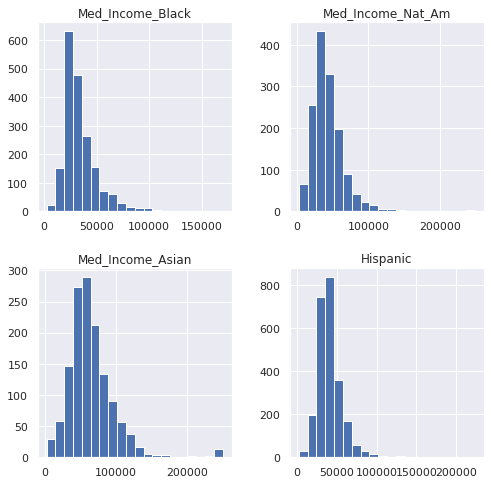

In [ ]:
df[['Med_Income_Black', 'Med_Income_Nat_Am', 'Med_Income_Asian', 'Hispanic']].hist(
                            bins=20, figsize=(8, 8))

## Note !

So from graph above we can use median to replace nan values because all of graphs are skewed to right.

In [ ]:
# Handle Null values
df['Med_Income_Black']  = df['Med_Income_Black'].fillna(df['Med_Income_Black'].median())

df['Med_Income_Nat_Am'] = df['Med_Income_Nat_Am'].fillna(df['Med_Income_Nat_Am'].median())

df['Med_Income_Asian']  = df['Med_Income_Asian'].fillna(df['Med_Income_Asian'].median())

df['Hispanic']          = df['Hispanic'].fillna(df['Hispanic'].median())

## Handle null Values

Maybe we will try with other handling of these values, but this is the first step we can go forward with, let move to next step, **but let check that our data now has no null values**

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3134 entries, 0 to 3133
Data columns (total 25 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   State              3134 non-null   object 
 1   AreaName           3134 non-null   object 
 2   All_Poverty        3134 non-null   int64  
 3   M_Poverty          3134 non-null   int64  
 4   F_Poverty          3134 non-null   int64  
 5   FIPS               3134 non-null   int64  
 6   Med_Income         3134 non-null   float64
 7   Med_Income_White   3134 non-null   float64
 8   Med_Income_Black   3134 non-null   float64
 9   Med_Income_Nat_Am  3134 non-null   float64
 10  Med_Income_Asian   3134 non-null   float64
 11  Hispanic           3134 non-null   float64
 12  M_With             3134 non-null   int64  
 13  M_Without          3134 non-null   int64  
 14  F_With             3134 non-null   int64  
 15  F_Without          3134 non-null   int64  
 16  All_With           3134 

In [ ]:
df.isnull().sum()

State                0
AreaName             0
All_Poverty          0
M_Poverty            0
F_Poverty            0
FIPS                 0
Med_Income           0
Med_Income_White     0
Med_Income_Black     0
Med_Income_Nat_Am    0
Med_Income_Asian     0
Hispanic             0
M_With               0
M_Without            0
F_With               0
F_Without            0
All_With             0
All_Without          0
fips_x               0
Incidence_Rate       0
Avg_Ann_Incidence    0
recent_trend         0
fips_y               0
Mortality_Rate       0
Avg_Ann_Deaths       0
dtype: int64

In [ ]:
df.head()

,State,AreaName,All_Poverty,M_Poverty,F_Poverty,FIPS,Med_Income,Med_Income_White,Med_Income_Black,Med_Income_Nat_Am,...,F_Without,All_With,All_Without,fips_x,Incidence_Rate,Avg_Ann_Incidence,recent_trend,fips_y,Mortality_Rate,Avg_Ann_Deaths
0,AK,"Aleutians East Borough, Alaska",553,334,219,2013,61518.0,72639.0,31250.0,54750.0,...,540,1442,1857,2013,*,3 or fewer,*,2013,*,*
1,AK,"Aleutians West Census Area, Alaska",499,273,226,2016,84306.0,97321.0,93750.0,48750.0,...,564,4177,1333,2016,*,3 or fewer,*,2016,*,*
2,AK,"Anchorage Municipality, Alaska",23914,10698,13216,2020,78326.0,87235.0,50535.0,53935.0,...,21393,243173,44638,2020,61.5,131,stable,2020,47.3,96
3,AK,"Bethel Census Area, Alaska",4364,2199,2165,2050,51012.0,92647.0,73661.0,41594.0,...,1774,13023,4482,2050,62.7,6,stable,2050,58.3,5
4,AK,"Bristol Bay Borough, Alaska",69,33,36,2060,79750.0,88000.0,30000.0,63333.0,...,67,768,191,2060,*,3 or fewer,*,2060,*,*


## Object Data Type

If we have looked to the info method output, at last line there are **7 (Object)**, but look back to these columns some of them looks like numbers, so let check these columns.

 - State (no problem with that)
 - AreaName no problem with that)
 
 Let check those ones.
 

 - Avg_Ann_Incidence
 - recent_trend
 - Avg_Ann_Deaths
 
## Note !!
Below two variables need different handling as mentioned in **Data dictionary for the merged data** that * mean < 16 cases.

- Incidence_Rate
- Mortality_Rate

**First let's check the frequency of each value in these variables.**

# Note !

Although its object column, but most of the data are numbers , so let's replace the non numbers by nan values and numbers with floating data types.

In [ ]:
def replace_non_numbers_with_nan(column):
    '''
    The function used to convert object column that seems like numbers to be float number.
    Argument:
        column : pandas series object, to apply the converation to float on.
    Return:
        col    : list, that contains floating point numbers find, nan values otherwise.
    
    '''
    col = []
    for x in list(column):
        try:
            x = float(re.findall('[-+]?(?:\d*\.\d+|\d+)', x)[0])
            col.append(x)
        except:
            col.append(np.nan)
    return col

In [ ]:
print(df['Avg_Ann_Incidence'].value_counts())

3 or fewer    211
_             192
6              88
9              79
7              73
             ... 
206             1
759             1
240             1
247             1
658             1
Name: Avg_Ann_Incidence, Length: 362, dtype: int64


In [ ]:
df['Avg_Ann_Incidence'] = replace_non_numbers_with_nan(df['Avg_Ann_Incidence'])

print(df['Avg_Ann_Incidence'].value_counts(dropna=False, ascending=True))

658.0      1
685.0      1
281.0      1
895.0      1
400.0      1
        ... 
7.0       73
9.0       79
6.0       88
NaN      209
3.0      235
Name: Avg_Ann_Incidence, Length: 360, dtype: int64


In [ ]:
print(df['Avg_Ann_Deaths'].value_counts())

*      325
5      120
4      113
9       98
8       93
      ... 
512      1
199      1
262      1
185      1
170      1
Name: Avg_Ann_Deaths, Length: 306, dtype: int64


In [ ]:
df['Avg_Ann_Deaths'] = replace_non_numbers_with_nan(df['Avg_Ann_Deaths'])

print(df['Avg_Ann_Deaths'].value_counts(dropna=False))

NaN      325
5.0      120
4.0      113
9.0       98
8.0       93
        ... 
512.0      1
199.0      1
262.0      1
185.0      1
170.0      1
Name: Avg_Ann_Deaths, Length: 306, dtype: int64


In [ ]:
def replace_non_words_with_nan(column):
    '''
    The function used to convert handle string object of non words
    Argument:
        column : pandas series object, to apply the converation to float on.
    Return:
        col    : list, that contains floating point numbers find, nan values otherwise.
    
    '''
    col = []
    most_frequent = column.value_counts().index.tolist()[0]
    for x in list(column):
        try:
            x = re.sub('[^A-Za-z]', 'nan', x)
            if "nan" in x:
                x = most_frequent
            col.append(x)
        except:
            col.append(np.nan)
    return col

In [ ]:
print(df['recent_trend'].value_counts())

stable     2426
*           258
falling     198
_           192
rising       43
__           17
Name: recent_trend, dtype: int64


In [ ]:
df['recent_trend'] = replace_non_words_with_nan(df['recent_trend'])
print(df['recent_trend'].value_counts())

stable     2893
falling     198
rising       43
Name: recent_trend, dtype: int64


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fac6d432890>,
      dtype=object)

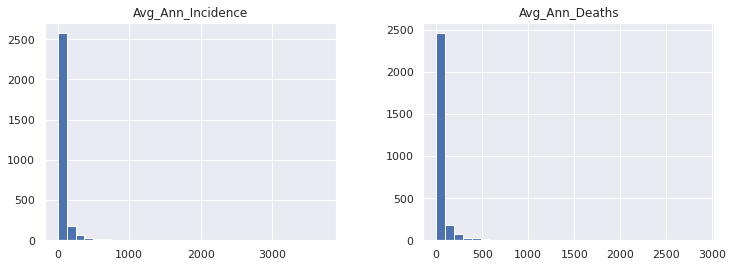

In [ ]:
df[[ 'Avg_Ann_Incidence',  'Avg_Ann_Deaths']].hist(
                            bins=30, figsize=(12, 4))

In [ ]:
print(df['Avg_Ann_Incidence'].mean())
print(df['Avg_Ann_Incidence'].median())
print("="*50)
print(df['Avg_Ann_Incidence'].value_counts(dropna=False))

71.07931623931624
25.0
3.0      235
NaN      209
6.0       88
9.0       79
7.0       73
        ... 
759.0      1
240.0      1
247.0      1
476.0      1
658.0      1
Name: Avg_Ann_Incidence, Length: 360, dtype: int64


In [ ]:
print(df['Avg_Ann_Deaths'].mean())
print(df['Avg_Ann_Deaths'].median())
print("="*50)
print(df['Avg_Ann_Deaths'].value_counts(dropna=False))

55.82235671057316
21.0
NaN      325
5.0      120
4.0      113
9.0       98
8.0       93
        ... 
512.0      1
199.0      1
262.0      1
185.0      1
170.0      1
Name: Avg_Ann_Deaths, Length: 306, dtype: int64


## Note !

**Incidence Rate and Mortality Rate looks like normally distributed so we can replaces the nan values by mean or median they will be close to each other as you saw above.**

**While the Avg_Ann_Incidence and Avg_Ann_Deaths, right skweed so we can replace as like others with median.**


In [ ]:
# Handle Null values


df['Avg_Ann_Incidence']  = df['Avg_Ann_Incidence'].fillna(df['Avg_Ann_Incidence'].median())

df['Avg_Ann_Deaths']     = df['Avg_Ann_Deaths'].fillna(df['Avg_Ann_Deaths'].median())

print(df['Avg_Ann_Incidence'].value_counts(dropna=False))
print("="*50)

print(df['Avg_Ann_Deaths'].value_counts(dropna=False))
print("="*50)


25.0     241
3.0      235
6.0       88
9.0       79
7.0       73
        ... 
682.0      1
212.0      1
206.0      1
236.0      1
658.0      1
Name: Avg_Ann_Incidence, Length: 359, dtype: int64
21.0     373
5.0      120
4.0      113
9.0       98
8.0       93
        ... 
512.0      1
199.0      1
262.0      1
185.0      1
170.0      1
Name: Avg_Ann_Deaths, Length: 305, dtype: int64


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3134 entries, 0 to 3133
Data columns (total 25 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   State              3134 non-null   object 
 1   AreaName           3134 non-null   object 
 2   All_Poverty        3134 non-null   int64  
 3   M_Poverty          3134 non-null   int64  
 4   F_Poverty          3134 non-null   int64  
 5   FIPS               3134 non-null   int64  
 6   Med_Income         3134 non-null   float64
 7   Med_Income_White   3134 non-null   float64
 8   Med_Income_Black   3134 non-null   float64
 9   Med_Income_Nat_Am  3134 non-null   float64
 10  Med_Income_Asian   3134 non-null   float64
 11  Hispanic           3134 non-null   float64
 12  M_With             3134 non-null   int64  
 13  M_Without          3134 non-null   int64  
 14  F_With             3134 non-null   int64  
 15  F_Without          3134 non-null   int64  
 16  All_With           3134 

In [ ]:
print(df['Mortality_Rate'].value_counts(dropna=False))

*       325
48.3     19
51.8     17
56.3     15
54.4     14
       ... 
81.3      1
31.5      1
32.1      1
75.8      1
83.6      1
Name: Mortality_Rate, Length: 618, dtype: int64


In [ ]:
print(df['Incidence_Rate'].value_counts(dropna=False))

*         211
_         192
65.2       19
__         17
66.3       12
         ... 
69.7 #      1
71.4 #      1
60.7 #      1
45.3 #      1
23.7        1
Name: Incidence_Rate, Length: 813, dtype: int64


In [ ]:

df['Incidence_Rate'] = replace_non_numbers_with_nan(df['Incidence_Rate'])

df['Incidence_Rate']  = df['Incidence_Rate'].fillna(16)



df['Mortality_Rate'] = replace_non_numbers_with_nan(df['Mortality_Rate'])


df['Mortality_Rate']  = df['Mortality_Rate'].fillna(16)

In [ ]:
print(df['Mortality_Rate'].value_counts(dropna=False))

16.0    325
48.3     19
51.8     17
56.3     15
54.4     14
       ... 
81.3      1
31.5      1
32.1      1
75.8      1
83.6      1
Name: Mortality_Rate, Length: 618, dtype: int64


In [ ]:
print(df['Incidence_Rate'].value_counts(dropna=False))

16.0     420
65.2      19
68.9      12
71.5      12
66.3      12
        ... 
123.2      1
113.0      1
95.3       1
94.5       1
23.7       1
Name: Incidence_Rate, Length: 740, dtype: int64


## Info Again

Some columns like FIPS, fips_x, fips_y maybe have some relationship, lets check.

Also other columns like M_With, F_With, All_With maybe have relationship like All_With = M_With + F_With,
same as  M_Without, F_Without, All_Without maybe have relationship like All_With = M_With + F_With.

**So first let's check the correlation between these columns.**

Correlation matrix is : 


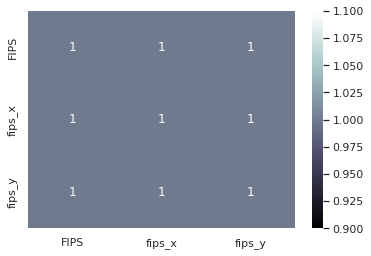

In [ ]:
matrix = df[['FIPS', 'fips_x', 'fips_y']].corr()
print("Correlation matrix is : ")
sns.heatmap(matrix,cmap="bone",annot=True)

## Note !

The 3 variables with same values, so we can just keep one of them, and drop the other ones.

In [ ]:
df.drop(['fips_x', 'fips_y'],axis=1, inplace=True)
df.head()

,State,AreaName,All_Poverty,M_Poverty,F_Poverty,FIPS,Med_Income,Med_Income_White,Med_Income_Black,Med_Income_Nat_Am,...,M_Without,F_With,F_Without,All_With,All_Without,Incidence_Rate,Avg_Ann_Incidence,recent_trend,Mortality_Rate,Avg_Ann_Deaths
0,AK,"Aleutians East Borough, Alaska",553,334,219,2013,61518.0,72639.0,31250.0,54750.0,...,1317,566,540,1442,1857,16.0,3.0,stable,16.0,21.0
1,AK,"Aleutians West Census Area, Alaska",499,273,226,2016,84306.0,97321.0,93750.0,48750.0,...,769,1707,564,4177,1333,16.0,3.0,stable,16.0,21.0
2,AK,"Anchorage Municipality, Alaska",23914,10698,13216,2020,78326.0,87235.0,50535.0,53935.0,...,23245,122426,21393,243173,44638,61.5,131.0,stable,47.3,96.0
3,AK,"Bethel Census Area, Alaska",4364,2199,2165,2050,51012.0,92647.0,73661.0,41594.0,...,2708,6627,1774,13023,4482,62.7,6.0,stable,58.3,5.0
4,AK,"Bristol Bay Borough, Alaska",69,33,36,2060,79750.0,88000.0,30000.0,63333.0,...,124,349,67,768,191,16.0,3.0,stable,16.0,21.0


In [ ]:
print(sum(df['All_With'] == df['M_With'] + df['F_With'])       == len(df))
print(sum(df['All_Without']    == df['M_Without'] + df['F_Without']) == len(df))

True
True


In [ ]:
# So from that we can drop all_with and All_Without, All_Poverty
df.drop(['All_Without', 'All_With', 'All_Poverty'],axis=1, inplace=True)
df.head()

,State,AreaName,M_Poverty,F_Poverty,FIPS,Med_Income,Med_Income_White,Med_Income_Black,Med_Income_Nat_Am,Med_Income_Asian,Hispanic,M_With,M_Without,F_With,F_Without,Incidence_Rate,Avg_Ann_Incidence,recent_trend,Mortality_Rate,Avg_Ann_Deaths
0,AK,"Aleutians East Borough, Alaska",334,219,2013,61518.0,72639.0,31250.0,54750.0,62679.0,51250.0,876,1317,566,540,16.0,3.0,stable,16.0,21.0
1,AK,"Aleutians West Census Area, Alaska",273,226,2016,84306.0,97321.0,93750.0,48750.0,81250.0,77500.0,2470,769,1707,564,16.0,3.0,stable,16.0,21.0
2,AK,"Anchorage Municipality, Alaska",10698,13216,2020,78326.0,87235.0,50535.0,53935.0,63757.0,53926.0,120747,23245,122426,21393,61.5,131.0,stable,47.3,96.0
3,AK,"Bethel Census Area, Alaska",2199,2165,2050,51012.0,92647.0,73661.0,41594.0,110625.0,160114.0,6396,2708,6627,1774,62.7,6.0,stable,58.3,5.0
4,AK,"Bristol Bay Borough, Alaska",33,36,2060,79750.0,88000.0,30000.0,63333.0,60405.0,25625.0,419,124,349,67,16.0,3.0,stable,16.0,21.0


In [ ]:
df['AreaName'].value_counts()

Aleutians East Borough, Alaska    1
Putnam County, Ohio               1
Lorain County, Ohio               1
Lucas County, Ohio                1
Madison County, Ohio              1
                                 ..
Knox County, Kentucky             1
Larue County, Kentucky            1
Laurel County, Kentucky           1
Lawrence County, Kentucky         1
Weston County, Wyoming            1
Name: AreaName, Length: 3134, dtype: int64

# Note !

As we can see also we can drop AreaName, because it just the same as ids, and its has no effect on the data, although maybe we can get something from the State itself. 

In [ ]:
# So from that we can drop all_with and All_Without
df.drop(['AreaName'],axis=1, inplace=True)
df.head()

,State,M_Poverty,F_Poverty,FIPS,Med_Income,Med_Income_White,Med_Income_Black,Med_Income_Nat_Am,Med_Income_Asian,Hispanic,M_With,M_Without,F_With,F_Without,Incidence_Rate,Avg_Ann_Incidence,recent_trend,Mortality_Rate,Avg_Ann_Deaths
0,AK,334,219,2013,61518.0,72639.0,31250.0,54750.0,62679.0,51250.0,876,1317,566,540,16.0,3.0,stable,16.0,21.0
1,AK,273,226,2016,84306.0,97321.0,93750.0,48750.0,81250.0,77500.0,2470,769,1707,564,16.0,3.0,stable,16.0,21.0
2,AK,10698,13216,2020,78326.0,87235.0,50535.0,53935.0,63757.0,53926.0,120747,23245,122426,21393,61.5,131.0,stable,47.3,96.0
3,AK,2199,2165,2050,51012.0,92647.0,73661.0,41594.0,110625.0,160114.0,6396,2708,6627,1774,62.7,6.0,stable,58.3,5.0
4,AK,33,36,2060,79750.0,88000.0,30000.0,63333.0,60405.0,25625.0,419,124,349,67,16.0,3.0,stable,16.0,21.0


In [ ]:
df['State'].value_counts()

TX    254
GA    159
VA    132
KY    120
MO    115
KS    105
IL    102
NC    100
IA     99
TN     95
NE     93
IN     92
OH     88
MN     87
MI     83
MS     82
OK     77
AR     75
WI     72
FL     67
PA     67
AL     67
SD     65
LA     64
CO     64
NY     62
CA     58
MT     56
WV     55
ND     53
SC     46
ID     44
WA     39
OR     36
NM     33
UT     29
MD     24
AK     23
WY     23
NJ     21
NV     17
ME     16
AZ     15
MA     14
VT     14
NH     10
CT      8
RI      5
HI      5
DE      3
DC      1
Name: State, dtype: int64

## Conclude
This notebook was just to get the data as cleaned as we can by some of the preprocessing steps, and handle missing values, non representative, irrelevant columns and so on. 

**Next step is to discover our data.**

In [ ]:
df.head()

,State,M_Poverty,F_Poverty,FIPS,Med_Income,Med_Income_White,Med_Income_Black,Med_Income_Nat_Am,Med_Income_Asian,Hispanic,M_With,M_Without,F_With,F_Without,Incidence_Rate,Avg_Ann_Incidence,recent_trend,Mortality_Rate,Avg_Ann_Deaths
0,AK,334,219,2013,61518.0,72639.0,31250.0,54750.0,62679.0,51250.0,876,1317,566,540,16.0,3.0,stable,16.0,21.0
1,AK,273,226,2016,84306.0,97321.0,93750.0,48750.0,81250.0,77500.0,2470,769,1707,564,16.0,3.0,stable,16.0,21.0
2,AK,10698,13216,2020,78326.0,87235.0,50535.0,53935.0,63757.0,53926.0,120747,23245,122426,21393,61.5,131.0,stable,47.3,96.0
3,AK,2199,2165,2050,51012.0,92647.0,73661.0,41594.0,110625.0,160114.0,6396,2708,6627,1774,62.7,6.0,stable,58.3,5.0
4,AK,33,36,2060,79750.0,88000.0,30000.0,63333.0,60405.0,25625.0,419,124,349,67,16.0,3.0,stable,16.0,21.0


In [ ]:
df.to_csv("dataset/merged_data_pre-processed.csv", index=False)

FileNotFoundError: ignored

In [ ]:
# def visualize_plot(data,plot_kind, x_axis, y_axis, point_size=50, color="gray", colorbar=False):
#     plt.figure(figsize=(10,10))
#     plt.style.use('fivethirtyeight')
#     df.plot(kind=plot_kind, x=x_axis, y=y_axis, s=point_size, 
#     c=color, cmap=plt.get_cmap("jet"), colorbar=colorbar)

#     return True


In [ ]:
# plt.figure(figsize=(10,5))
# matrix = df[['M_With', 'F_With', 'All_With', 'M_Without', 'F_Without', 'All_Without']].corr()
# print("Correlation matrix is : ")
# sns.heatmap(matrix,cmap="RdYlGn",annot=True, fmt='.4g')

Exploratory

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3134 entries, 0 to 3133
Data columns (total 19 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   State              3134 non-null   object 
 1   M_Poverty          3134 non-null   int64  
 2   F_Poverty          3134 non-null   int64  
 3   FIPS               3134 non-null   int64  
 4   Med_Income         3134 non-null   float64
 5   Med_Income_White   3134 non-null   float64
 6   Med_Income_Black   3134 non-null   float64
 7   Med_Income_Nat_Am  3134 non-null   float64
 8   Med_Income_Asian   3134 non-null   float64
 9   Hispanic           3134 non-null   float64
 10  M_With             3134 non-null   int64  
 11  M_Without          3134 non-null   int64  
 12  F_With             3134 non-null   int64  
 13  F_Without          3134 non-null   int64  
 14  Incidence_Rate     3134 non-null   float64
 15  Avg_Ann_Incidence  3134 non-null   float64
 16  recent_trend       3134 

In [ ]:
categorical_features = ['State', 'recent_trend']
numerical_features = ['M_Poverty', 'F_Poverty', 'FIPS','Med_Income', 'Med_Income_White',
                      'Med_Income_Black', 'Med_Income_Nat_Am', 'Med_Income_Asian', 
                      'Hispanic', 'M_With', 'M_Without', 'Incidence_Rate', 'Avg_Ann_Incidence',
                     'Mortality_Rate', 'Avg_Ann_Deaths']

Correlation matrix is : 


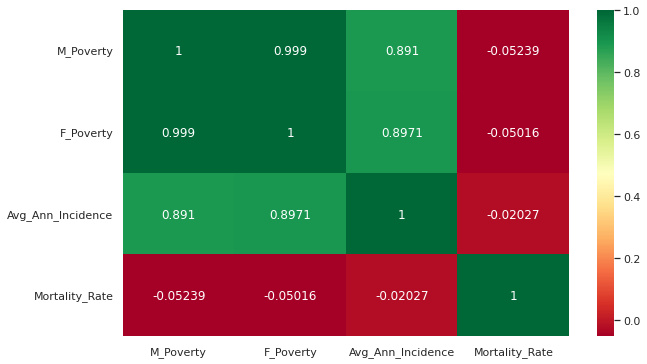

In [ ]:
plt.figure(figsize=(10,6))
matrix = df[['M_Poverty', 'F_Poverty', 
            'Avg_Ann_Incidence','Mortality_Rate']].corr()
print("Correlation matrix is : ")
sns.heatmap(matrix,cmap="RdYlGn",annot=True, fmt='.4g')

Correlation matrix is : 


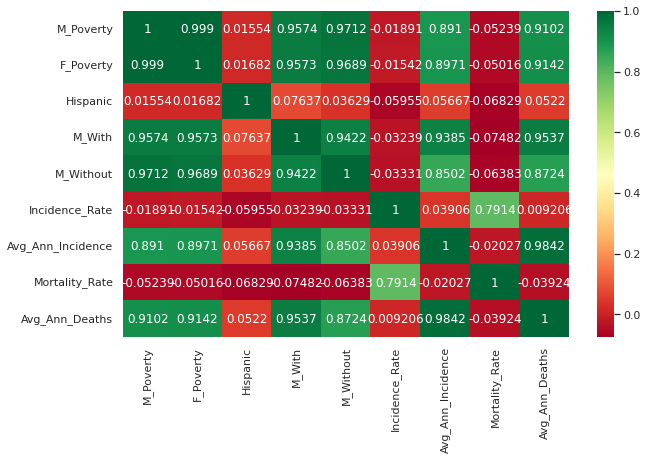

In [ ]:
plt.figure(figsize=(10,6))
matrix = df[['M_Poverty', 'F_Poverty', 'Hispanic', 'M_With', 'M_Without', 'Incidence_Rate',
            'Avg_Ann_Incidence','Mortality_Rate', 'Avg_Ann_Deaths']].corr()
print("Correlation matrix is : ")
sns.heatmap(matrix,cmap="RdYlGn",annot=True, fmt='.4g')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fac6d4218d0>,
      dtype=object)

<Figure size 720x432 with 0 Axes>

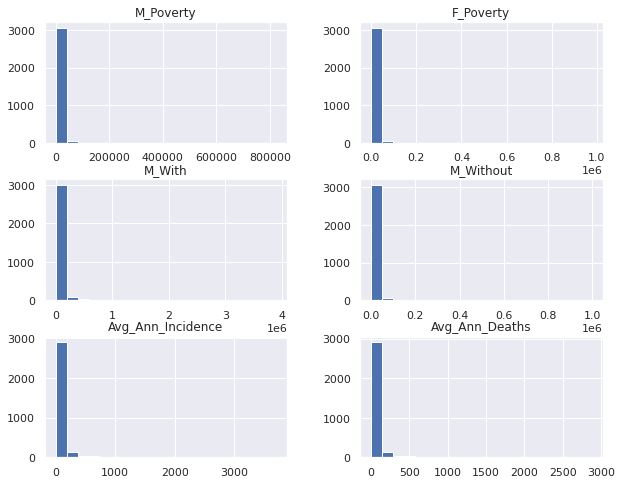

In [ ]:
plt.figure(figsize=(10,6))
df[['M_Poverty', 'F_Poverty', 'M_With', 'M_Without',
            'Avg_Ann_Incidence', 'Avg_Ann_Deaths']].hist(bins=20, figsize=(10,8))

In [ ]:
pt = preprocessing.PowerTransformer(method='box-cox', standardize=False)
log_scale = pt.fit_transform(df[['M_Poverty', 'F_Poverty', 'M_With', 'M_Without',
            'Avg_Ann_Incidence', 'Avg_Ann_Deaths']])

In [ ]:
log_scale = pd.DataFrame(log_scale, columns=['M_Poverty', 'F_Poverty', 'M_With', 'M_Without',
            'Avg_Ann_Incidence', 'Avg_Ann_Deaths'])

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fac6852c910>,
      dtype=object)

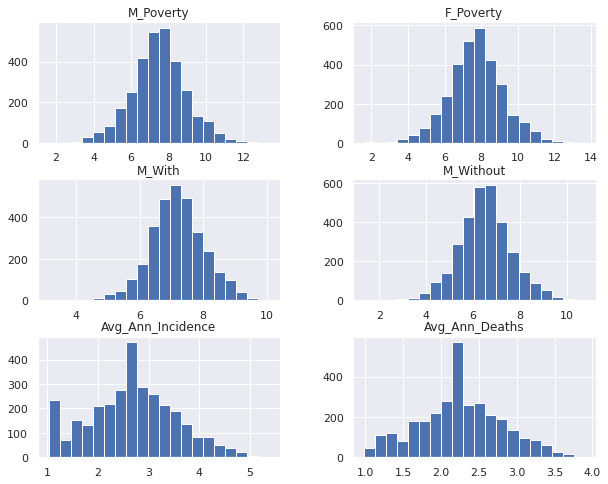

In [ ]:
log_scale.hist(bins=20, figsize=(10,8))

In [ ]:
log_scale.head()

,M_Poverty,F_Poverty,M_With,M_Without,Avg_Ann_Incidence,Avg_Ann_Deaths
0,5.766244,5.368211,5.599848,6.292671,1.033895,2.257616
1,5.567629,5.399430,6.278214,5.878096,1.033895,2.257616
2,9.163722,9.424631,8.488215,8.368044,3.759435,2.951143
3,7.617149,7.637853,6.865869,6.835111,1.623884,1.368471
4,3.480220,3.574287,5.091711,4.407670,1.033895,2.257616


Correlation matrix is : 


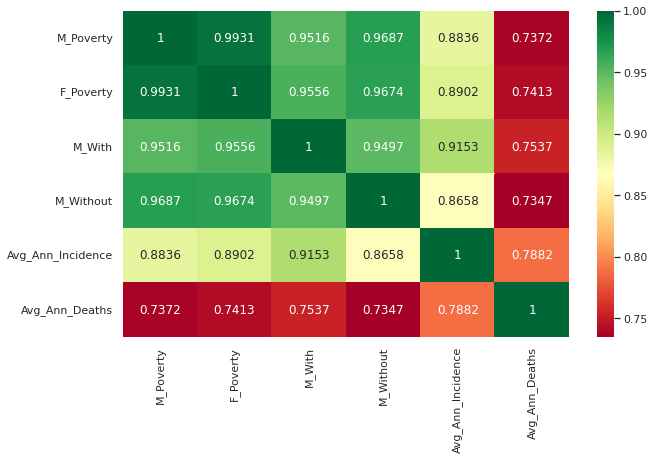

In [ ]:
plt.figure(figsize=(10,6))
matrix = log_scale.corr()
print("Correlation matrix is : ")
sns.heatmap(matrix,cmap="RdYlGn",annot=True, fmt='.4g')

In [ ]:
plt.figure(figsize=(10,6))
matrix = df[['Med_Income', 'Med_Income_White',
              'Med_Income_Black', 'Med_Income_Nat_Am', 'Med_Income_Asian', 
            'Avg_Ann_Incidence', 'Avg_Ann_Deaths']].corr()

matrix['Avg_Ann_Deaths'].sort_values(ascending=False)

Avg_Ann_Deaths       1.000000
Avg_Ann_Incidence    0.984177
Med_Income_White     0.270089
Med_Income           0.225049
Med_Income_Black     0.128901
Med_Income_Asian     0.083761
Med_Income_Nat_Am    0.033750
Name: Avg_Ann_Deaths, dtype: float64

<Figure size 720x432 with 0 Axes>

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fac68145390>,
      dtype=object)

<Figure size 720x432 with 0 Axes>

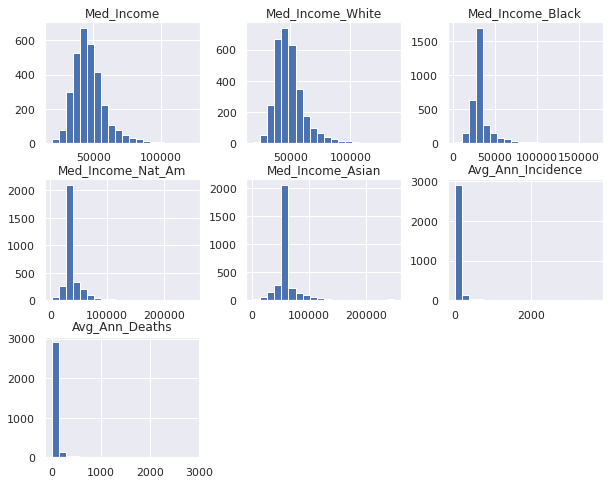

In [ ]:
plt.figure(figsize=(10,6))
df[['Med_Income', 'Med_Income_White',
              'Med_Income_Black', 'Med_Income_Nat_Am', 'Med_Income_Asian', 
            'Avg_Ann_Incidence', 'Avg_Ann_Deaths']].hist(bins=20, figsize=(10,8))

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fac67d9f710>,
      dtype=object)

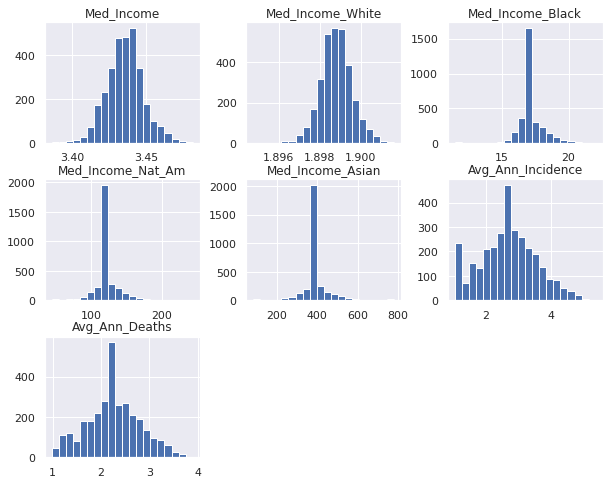

In [ ]:
pt = preprocessing.PowerTransformer(method='box-cox', standardize=False)
log_scale = pt.fit_transform(df[['Med_Income', 'Med_Income_White',
              'Med_Income_Black', 'Med_Income_Nat_Am', 'Med_Income_Asian', 
            'Avg_Ann_Incidence', 'Avg_Ann_Deaths']])


log_scale = pd.DataFrame(log_scale, columns=['Med_Income', 'Med_Income_White',
              'Med_Income_Black', 'Med_Income_Nat_Am', 'Med_Income_Asian', 
            'Avg_Ann_Incidence', 'Avg_Ann_Deaths'])

log_scale.hist(bins=20, figsize=(10,8))

In [ ]:
matrix = log_scale.corr()

matrix['Avg_Ann_Deaths'].sort_values(ascending=False)

Avg_Ann_Deaths       1.000000
Avg_Ann_Incidence    0.788248
Med_Income_White     0.285219
Med_Income           0.271605
Med_Income_Black     0.198643
Med_Income_Asian     0.080953
Med_Income_Nat_Am    0.070006
Name: Avg_Ann_Deaths, dtype: float64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fac6aa63a10>,
      dtype=object)

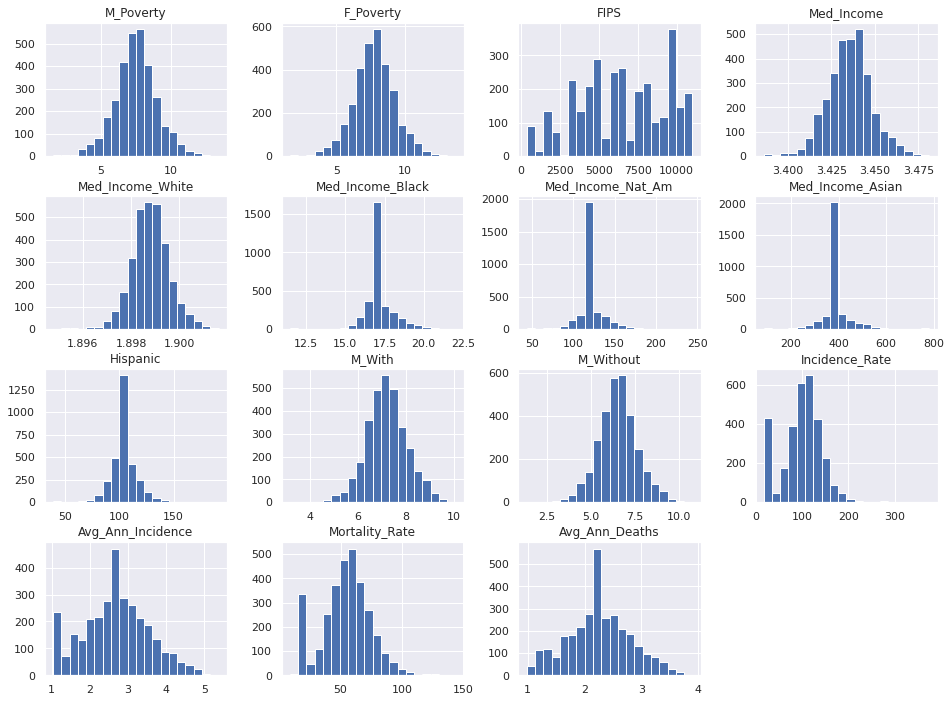

In [ ]:

pt = preprocessing.PowerTransformer(method='box-cox', standardize=False)


log_scale = pt.fit_transform(df[numerical_features])

df[numerical_features] = pd.DataFrame(log_scale, columns=numerical_features)


df[numerical_features].hist(bins=20, figsize=(16,12))

In [ ]:
df.head()

,State,M_Poverty,F_Poverty,FIPS,Med_Income,Med_Income_White,Med_Income_Black,Med_Income_Nat_Am,Med_Income_Asian,Hispanic,M_With,M_Without,F_With,F_Without,Incidence_Rate,Avg_Ann_Incidence,recent_trend,Mortality_Rate,Avg_Ann_Deaths
0,AK,5.766244,5.368211,684.085786,3.451072,1.900129,17.285424,139.776732,402.796797,114.666736,5.599848,6.292671,566,540,19.803971,1.033895,stable,16.123403,2.257616
1,AK,5.567629,5.399430,684.938033,3.465468,1.900891,20.277411,133.923171,456.077918,132.432609,6.278214,5.878096,1707,564,19.803971,1.033895,stable,16.123403,2.257616
2,AK,9.163722,9.424631,686.074037,3.462218,1.900619,18.557351,139.006510,406.099435,116.720717,8.488215,8.368044,122426,21393,95.073464,3.759435,stable,51.604112,2.951143
3,AK,7.617149,7.637853,694.582263,3.441905,1.900771,19.594522,126.304609,528.643550,170.332753,6.865869,6.835111,6627,1774,97.210195,1.623884,stable,64.329065,1.368471
4,AK,3.480220,3.574287,697.413750,3.463020,1.900642,17.179963,147.476683,395.731047,89.962742,5.091711,4.407670,349,67,19.803971,1.033895,stable,16.123403,2.257616


In [ ]:
df_copy = df.copy()
df_copy.head()

,State,M_Poverty,F_Poverty,FIPS,Med_Income,Med_Income_White,Med_Income_Black,Med_Income_Nat_Am,Med_Income_Asian,Hispanic,M_With,M_Without,F_With,F_Without,Incidence_Rate,Avg_Ann_Incidence,recent_trend,Mortality_Rate,Avg_Ann_Deaths
0,AK,5.766244,5.368211,684.085786,3.451072,1.900129,17.285424,139.776732,402.796797,114.666736,5.599848,6.292671,566,540,19.803971,1.033895,stable,16.123403,2.257616
1,AK,5.567629,5.399430,684.938033,3.465468,1.900891,20.277411,133.923171,456.077918,132.432609,6.278214,5.878096,1707,564,19.803971,1.033895,stable,16.123403,2.257616
2,AK,9.163722,9.424631,686.074037,3.462218,1.900619,18.557351,139.006510,406.099435,116.720717,8.488215,8.368044,122426,21393,95.073464,3.759435,stable,51.604112,2.951143
3,AK,7.617149,7.637853,694.582263,3.441905,1.900771,19.594522,126.304609,528.643550,170.332753,6.865869,6.835111,6627,1774,97.210195,1.623884,stable,64.329065,1.368471
4,AK,3.480220,3.574287,697.413750,3.463020,1.900642,17.179963,147.476683,395.731047,89.962742,5.091711,4.407670,349,67,19.803971,1.033895,stable,16.123403,2.257616


In [ ]:
df_copy.drop(['State', 'recent_trend'] ,axis=1, inplace=True)
df_copy.head()

,M_Poverty,F_Poverty,FIPS,Med_Income,Med_Income_White,Med_Income_Black,Med_Income_Nat_Am,Med_Income_Asian,Hispanic,M_With,M_Without,F_With,F_Without,Incidence_Rate,Avg_Ann_Incidence,Mortality_Rate,Avg_Ann_Deaths
0,5.766244,5.368211,684.085786,3.451072,1.900129,17.285424,139.776732,402.796797,114.666736,5.599848,6.292671,566,540,19.803971,1.033895,16.123403,2.257616
1,5.567629,5.399430,684.938033,3.465468,1.900891,20.277411,133.923171,456.077918,132.432609,6.278214,5.878096,1707,564,19.803971,1.033895,16.123403,2.257616
2,9.163722,9.424631,686.074037,3.462218,1.900619,18.557351,139.006510,406.099435,116.720717,8.488215,8.368044,122426,21393,95.073464,3.759435,51.604112,2.951143
3,7.617149,7.637853,694.582263,3.441905,1.900771,19.594522,126.304609,528.643550,170.332753,6.865869,6.835111,6627,1774,97.210195,1.623884,64.329065,1.368471
4,3.480220,3.574287,697.413750,3.463020,1.900642,17.179963,147.476683,395.731047,89.962742,5.091711,4.407670,349,67,19.803971,1.033895,16.123403,2.257616


In [ ]:
df_copy.describe()

,M_Poverty,F_Poverty,FIPS,Med_Income,Med_Income_White,Med_Income_Black,Med_Income_Nat_Am,Med_Income_Asian,Hispanic,M_With,M_Without,F_With,F_Without,Incidence_Rate,Avg_Ann_Incidence,Mortality_Rate,Avg_Ann_Deaths
count,3134.000000,3134.000000,3134.000000,3134.000000,3134.000000,3134.000000,3134.000000,3134.000000,3134.000000,3134.000000,3134.000000,3.134000e+03,3134.000000,3134.000000,3134.000000,3134.000000,3134.000000
mean,7.476456,7.731500,6474.491840,3.435509,1.898789,17.255620,123.775032,396.922473,104.289519,7.193966,6.522421,4.487357e+04,5968.701021,98.427307,2.676764,54.089623,2.259279
std,1.496206,1.502265,2819.615083,0.012722,0.000794,0.948523,16.525184,64.279581,12.205534,0.854043,1.115512,1.406455e+05,24657.276997,43.260663,0.873315,20.100357,0.552969
min,1.605981,1.607574,381.317361,3.386007,1.894758,11.450467,43.967328,85.138235,39.146679,3.138798,1.350691,3.300000e+01,4.000000,16.163093,1.033895,8.663262,0.982487
25%,6.573242,6.829987,4460.963037,3.427665,1.898290,16.941756,123.353027,395.731047,99.087473,6.653407,5.858613,4.657500e+03,633.000000,76.160788,2.103681,43.361171,1.889504
50%,7.486758,7.728156,6381.825496,3.435584,1.898785,17.179963,123.353027,395.731047,103.617144,7.154055,6.513921,1.110800e+04,1529.000000,103.654355,2.703862,55.411212,2.257616
75%,8.359969,8.613885,9175.418981,3.443080,1.899258,17.374726,123.353027,395.731047,108.906802,7.713602,7.193351,2.976475e+04,3834.000000,125.247758,3.242220,66.187766,2.609197
max,13.376474,13.655803,11003.830349,3.481298,1.901635,22.032414,243.960837,780.552820,191.224413,10.081876,10.767165,4.230137e+06,837175.000000,374.827240,5.377341,143.725413,3.898289


In [ ]:
numerical_features = ['M_Poverty', 'F_Poverty', 'FIPS','Med_Income', 'Med_Income_White',
                      'Med_Income_Black', 'Med_Income_Nat_Am', 'Med_Income_Asian', 
                      'Hispanic', 'M_With', 'M_Without', 'Incidence_Rate', 'Avg_Ann_Incidence',
                     'Mortality_Rate']
X_train, X_test, y_train, y_test = train_test_split(df_copy.iloc[:, :-1], df_copy.iloc[:, -1], test_size=0.2, 
                                                    random_state=42)
X_train.head()

,M_Poverty,F_Poverty,FIPS,Med_Income,Med_Income_White,Med_Income_Black,Med_Income_Nat_Am,Med_Income_Asian,Hispanic,M_With,M_Without,F_With,F_Without,Incidence_Rate,Avg_Ann_Incidence,Mortality_Rate
755,6.998475,7.711762,4092.060529,3.437706,1.898743,17.179963,123.353027,395.731047,125.563736,7.099507,5.658722,13000,822,140.666552,2.914860,76.208457
3123,8.101085,8.425250,11000.552657,3.447285,1.899477,16.702670,126.701496,395.731047,105.826888,7.817045,7.431036,33595,5518,89.227759,3.143030,44.936909
221,10.254187,10.391529,1723.450159,3.452937,1.899888,18.618808,142.504053,420.910656,113.297728,8.674423,8.692306,186064,30108,61.417919,3.967805,31.031137
543,8.011917,8.267416,3663.221438,3.453751,1.899711,19.295743,159.671684,413.399623,120.453396,7.774143,6.985116,32223,2228,66.672337,3.006695,37.050272
1395,7.893845,8.020463,6349.130139,3.425797,1.898125,15.708804,69.948693,85.138235,71.249069,7.177111,6.206763,11811,1435,88.522280,2.336911,46.772909


In [ ]:
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)

LinearRegression()

In [ ]:
# Now lets do it on the whole dataset
predictions = lin_reg.predict(X_train)
error = mean_squared_error(predictions, y_train)
error

0.09233860888113603

In [ ]:
# Now lets do it on the whole dataset
predictions = lin_reg.predict(X_test)
error = mean_squared_error(predictions, y_test)
error

0.08967417614945375